#### Contents
- Performing explorartory data analysis.
- Visualising which factor influenced a candidate in getting placed.
- Performing data preprocessing.
- Performing model building.
- Performing feature scaling for maintaining imbalanced of our dataset.
- Applying different types of classification model for predicting best accuracy.
- Performing different types of method and curve for calculating and visualising accuracy of our different classification model.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### To ignore warning msg...

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import seaborn as sns
sns.set(style="darkgrid")

In [41]:
dataset = pd.read_csv("jobPlacement.csv")
dataset.sample(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
200,201,M,69.0,Others,60.0,Others,Commerce,65.00,Comm&Mgmt,No,87.55,Mkt&Fin,52.81,Placed,300000.0
87,88,M,59.6,Central,51.0,Central,Science,60.00,Others,No,75.00,Mkt&HR,59.08,Not Placed,NaN
83,84,M,84.0,Others,79.0,Others,Science,68.00,Sci&Tech,Yes,84.00,Mkt&Fin,66.69,Placed,300000.0
60,61,M,74.0,Central,70.0,Central,Science,72.00,Comm&Mgmt,Yes,60.00,Mkt&Fin,57.24,Placed,260000.0
115,116,F,73.0,Others,63.0,Others,Science,66.00,Comm&Mgmt,No,89.00,Mkt&Fin,60.50,Placed,216000.0
190,191,F,64.0,Others,70.2,Central,Commerce,61.00,Comm&Mgmt,No,50.00,Mkt&Fin,62.50,Not Placed,NaN
75,76,F,59.0,Central,62.0,Others,Commerce,77.50,Comm&Mgmt,No,74.00,Mkt&HR,67.00,Not Placed,NaN
48,49,M,63.0,Others,62.0,Others,Commerce,68.00,Comm&Mgmt,No,64.00,Mkt&Fin,62.46,Placed,250000.0
142,143,M,85.0,Central,60.0,Others,Science,73.43,Sci&Tech,Yes,60.00,Mkt&Fin,61.29,Placed,260000.0
161,162,M,55.6,Others,51.0,Others,Commerce,57.50,Comm&Mgmt,No,57.63,Mkt&HR,62.72,Not Placed,NaN


In [42]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

<Axes: xlabel='salary', ylabel='Density'>

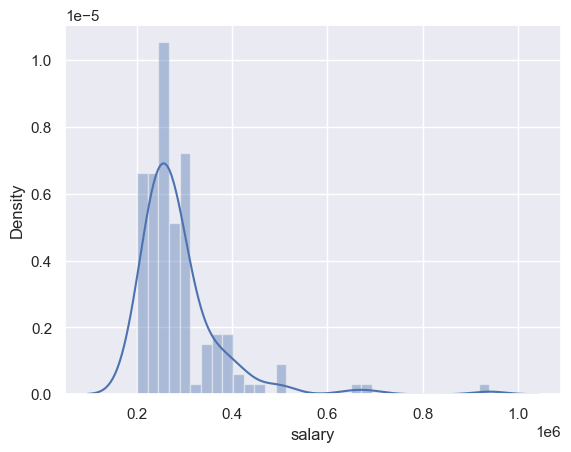

In [43]:
sns.distplot(dataset.salary)

#### We are going to fill misisng salaries with 0 as they represent students who have not got placement offer...

In [44]:
dataset = dataset.fillna(0)

<Axes: xlabel='gender', ylabel='salary'>

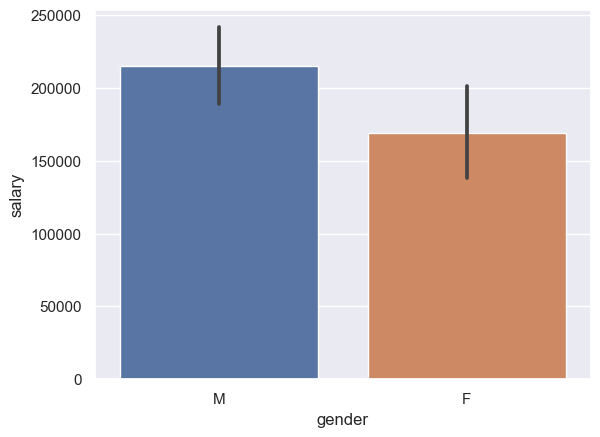

In [45]:
sns.barplot(x = dataset['gender'],y = dataset['salary'])

<b>1st observation</b> = in this visualisation we saw that man are given more salary even though women are scoring better the man.

<b>2nd observation</b> = student with higher percentage better acedmic result are able to perfrom better during placement compared to those who are not getting higher percentage...

Now we are doing <b>Salary VS Academic rasult</b> analysis...


In [46]:
dataset_less6M=dataset[dataset.salary<600000]

dataset.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


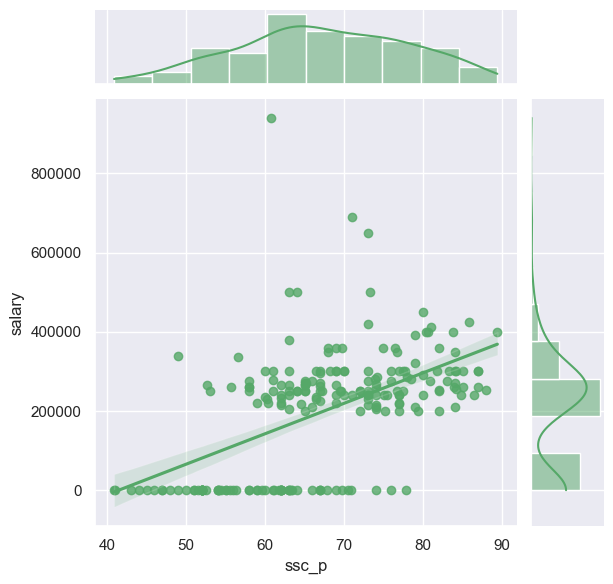

In [47]:
sns.jointplot(x=dataset["ssc_p"],y=dataset["salary"],kind="reg",color="g")

<b>3rd observation</b> = student with average percent of 60 to 70 percent are getting salary around 250000 NRB anually. Higher percentage does not neccesarily corresponds to higher salary package...

Text(0.5, 1.0, 'Barplot showing placement among specalisation')

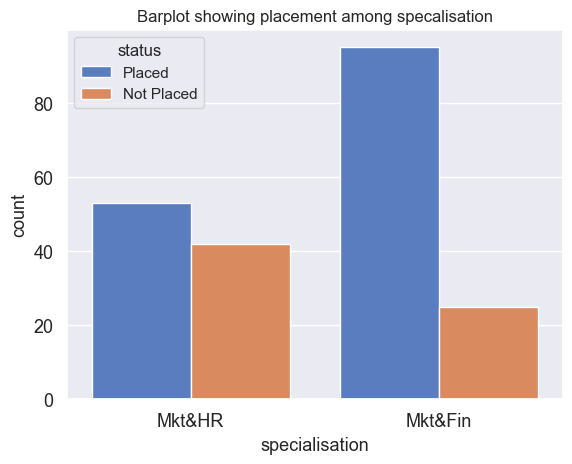

In [48]:
plt.rc("axes",labelsize=13)
plt.rc("xtick",labelsize=13)
plt.rc("ytick",labelsize=13)
sns.countplot(x=dataset["specialisation"],hue=dataset["status"],palette="muted").set_title("Barplot showing placement among specalisation")

Text(0.5, 1.0, 'Barplot showing placement acocording work experiences')

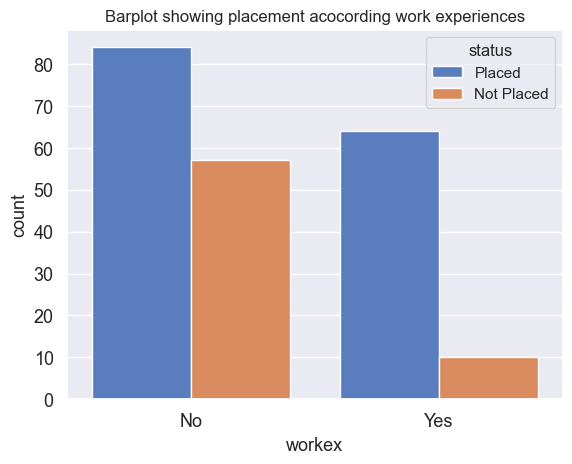

In [49]:
plt.rc("axes",labelsize=13)
plt.rc("xtick",labelsize=13)
plt.rc("ytick",labelsize=13)
sns.countplot(x=dataset["workex"],hue=dataset["status"],palette="muted").set_title("Barplot showing placement acocording work experiences")

## DATA PRE-PROCESSING

In [50]:
numeric_data= dataset.select_dtypes(include=[np.number])
categorical_data = dataset.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in dataset"
.format(numeric_data.shape[1],categorical_data.shape[1]))

There are 7 numeric and 8 categorical columns in dataset


## Feature Engineering 
#### we need to change 'categorical' data to numerical 

In [51]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
# implementing le on gender (1)
le.fit(dataset.gender.drop_duplicates())
dataset.gender = le.transform(dataset.gender)
# implementing le on ssc_b (2)
le.fit(dataset.ssc_b.drop_duplicates())
dataset.ssc_b = le.transform(dataset.ssc_b)
# implementing le on hsc_b (3)
le.fit(dataset.hsc_b.drop_duplicates())
dataset.hsc_b = le.transform(dataset.hsc_b)
# implementing le on hsc_s (4)
le.fit(dataset.hsc_s.drop_duplicates())
dataset.hsc_s = le.transform(dataset.hsc_s)
# implementing le on degree_t (5)
le.fit(dataset.degree_t.drop_duplicates())
dataset.degree_t = le.transform(dataset.degree_t)
# implementing le on workex (6)
le.fit(dataset.workex.drop_duplicates())
dataset.workex = le.transform(dataset.workex)
# implementing le on specialisation (7)	
le.fit(dataset.specialisation.drop_duplicates())
dataset.specialisation = le.transform(dataset.specialisation)
# implementing le on status (8)
le.fit(dataset.status.drop_duplicates())
dataset.status = le.transform(dataset.status)

In [52]:
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status' ] 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

array_hot_encoded = ohe.fit_transform(dataset[categorical_cols])

data_hot_encoded = pd.DataFrame(array_hot_encoded, index=dataset.index)

data_other_cols = dataset.drop(columns=categorical_cols)

data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [53]:
dataset.sample(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
132,133,1,67.00,1,68.00,1,1,64.00,0,1,74.40,1,53.49,1,300000.0
203,204,1,55.68,1,61.33,1,1,56.87,0,0,66.00,1,58.30,1,260000.0
80,81,0,69.00,1,62.00,1,1,69.00,0,1,67.00,1,62.35,1,240000.0
38,39,0,73.00,1,58.00,1,2,66.00,0,0,53.70,1,56.86,1,240000.0
68,69,0,69.70,0,47.00,0,1,72.70,2,0,79.00,1,59.24,0,0.0
121,122,0,64.00,0,67.00,1,2,69.60,2,1,55.67,1,71.49,1,250000.0
21,22,0,79.00,1,76.00,1,1,85.00,0,0,95.00,0,69.06,1,393000.0
174,175,1,73.24,1,50.83,1,2,64.27,2,1,64.00,0,66.23,1,500000.0
100,101,0,45.00,1,57.00,1,1,58.00,0,1,56.39,1,64.95,0,0.0
25,26,0,52.58,1,54.60,0,1,50.20,0,1,76.00,0,65.33,0,0.0


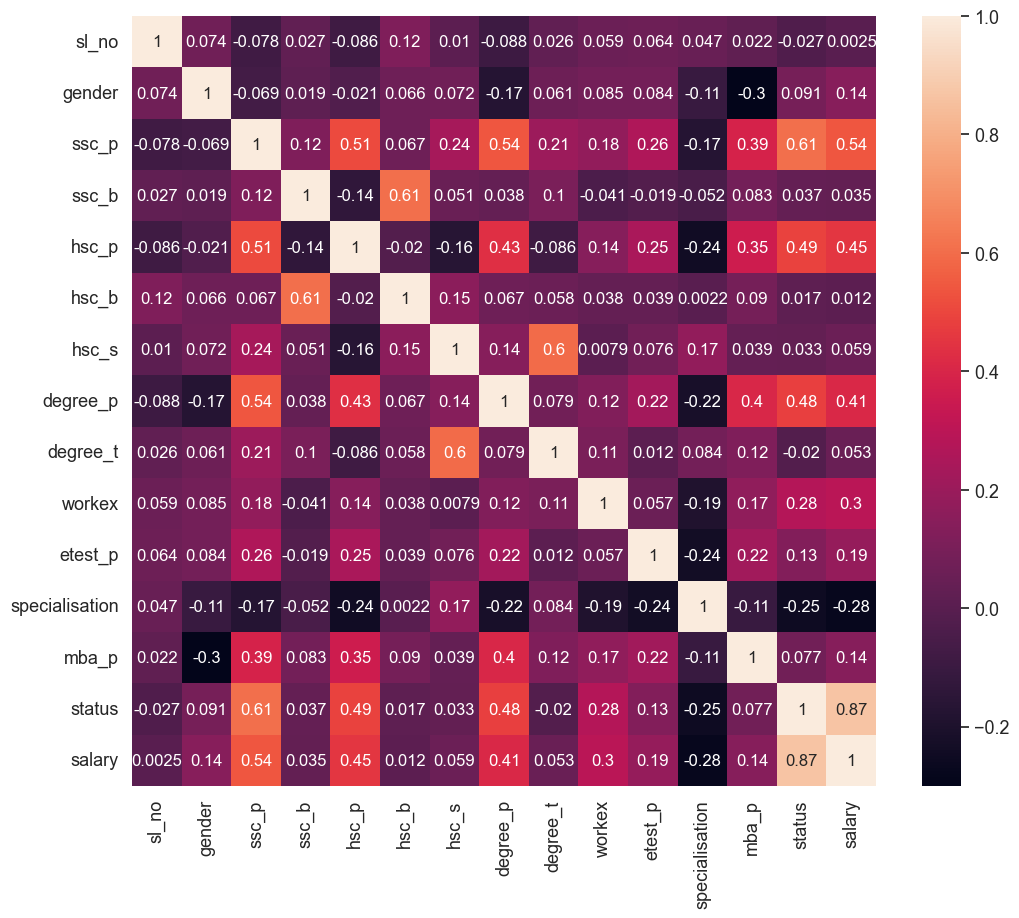

In [54]:
plt.figure(figsize=(12,10))
corrMatrix=dataset.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

## BUILDING MODEL

In [55]:
x = dataset.iloc[:, 1:13].values
y = dataset.iloc[:, -2].values

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

In [57]:
# from imblearn.combine import SMOTETomek
# smk = SMOTETomek(random_state = 42)
# x,y = smk.fit_resample(x,y)

## LOGISTIC REGRESSION

[[10  7]
 [ 3 34]]
Accuracy - 0.8148148148148148
Precision - 0.8103675908553958
Recall- 0.8148148148148148
f1 - 0.8072174738841406
0.8175858785614882
roc_auc_score for Logistic Regression:  0.8744038155802862


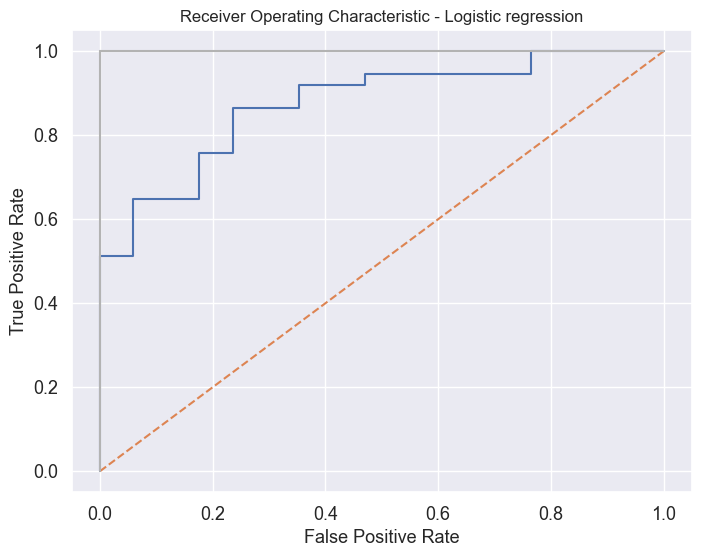

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression (solver='liblinear', random_state=0)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(y_test,y_pred)
precision =  precision_score(y_test,y_pred,average="weighted")
recall = recall_score(y_test,y_pred,average="weighted")
f1 = f1_score(y_test,y_pred,average="weighted")
print("Accuracy - {}".format(accuracy))
print("Precision - {}".format(precision))
print("Recall- {}".format(recall))
print("f1 - {}".format(f1))

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test,y_pred)
print(average_precision)

# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve
# disp = plot_precision_recall_curve(classifier,x_test,y_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_score2 = classifier.predict_proba(x_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




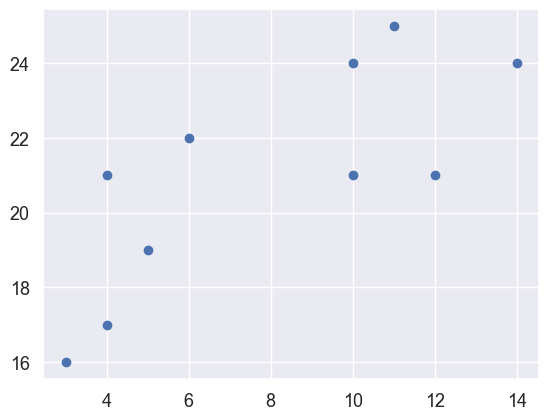

In [59]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()



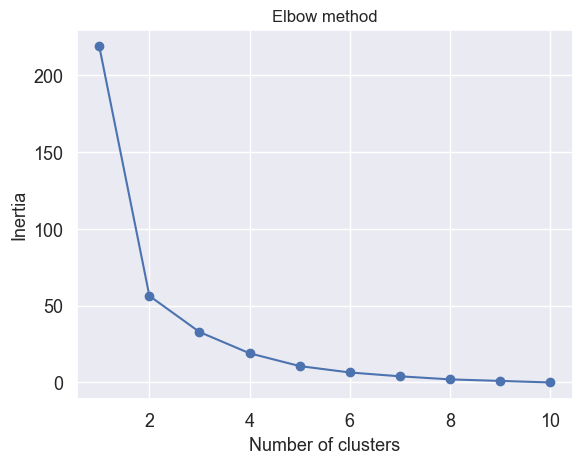

In [60]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

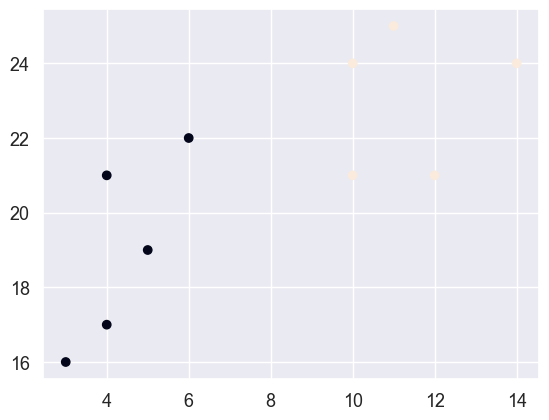

In [61]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

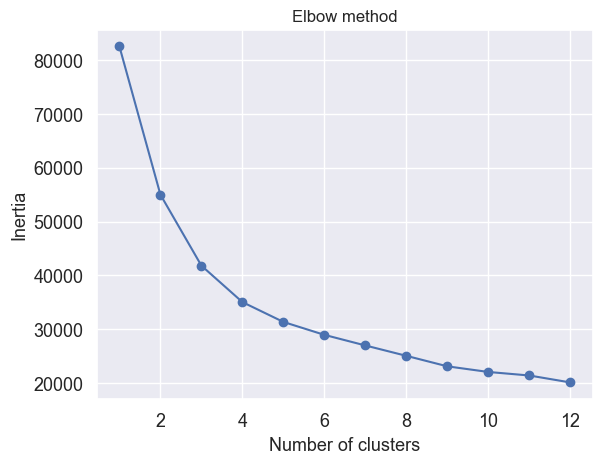

[[6 0 1 5 1 2 2 0]
 [2 7 3 5 2 8 8 2]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
0.24074074074074073
Accuracy: -309202.40 %
Standard Deviation: 44690.61 %


In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=i)
classifier = KMeans(random_state = 0)
classifier.fit(x_train, y_train)

inertias = []
for i in range(1,13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_train, y_train)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,13), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [72]:
from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(algorithm='auto',leaf_size =30, metric='minikowski', matric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='inform')
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,accuracy_score,f1_score,precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

accuracy= accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average ="weighted")
recall = recall_score(y_test, y_pred, average ="weighted")
f1 = f1_score(y_test, y_pred, average ="weighted")
print("Accuracy - {}".format(accuracy))
print("Precision - {}".format(precision))
print("Recall - {}".format(recall))
print("f1 - {}".format(f1))

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)
print("Average Precision {}".format(average_precision))
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

y_score1 = classifier.predict_proba(x_test)[:, 1]
false_positive_rate1, true_positive_rate1, threshold2 = roc_curve(y_test, y_score1)
print('roc_auc_score for k nearest neighbour:', roc_auc_score(y_test, y_score1))

plt.subplot(2, figsize=(8,6))
plt.title('Receiver Operating Characteristic -k_nearest_neighbour')
plt.plot(false_positive_rate1, true_positive_rate1)

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()
plt.show()


[[ 7 10]
 [ 4 33]]
Accuracy - 0.7407407407407407
Precision - 0.7261764936183541
Recall - 0.7407407407407407
f1 - 0.7226851851851852
Average Precision 0.75854924692134
roc_auc_score for k nearest neighbour: 0.7241653418124007


ValueError: Single argument to subplot must be a three-digit integer, not 2

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[10  7]
 [ 4 33]]
0.7962962962962963
Accuracy: 87.50 %
Standard Deviation: 9.68 %
